In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
def gauss(sig=1,x0=0):
    x = np.linspace(x0-10*sig,x0+10*sig,1000)
    y = 1.0/(np.sqrt(2*np.pi)*sig)*np.exp(-(x-x0)**2/(2*sig**2))
    return x,y

In [4]:
rand = np.random.normal(5,2,100)
print(rand)

[ 4.33998033  4.40940813  2.67086495  4.26452588  4.05294945  5.64758135
  5.04064465  3.81530058  2.7752107   4.37940894  4.99545788  5.98353972
  3.22786959  5.34456392  9.18693244  4.77665515  3.84541012  6.07616714
  6.36515003  3.42242135  8.34941921  2.16496955  4.90939179  4.94768875
  7.62693294  3.63056557  2.43914222  3.17232743  4.82631287  7.22026723
  7.07113514  6.00821909  9.50022821  4.93477828  8.37220271  8.6150643
  5.64581542  3.13671896  5.32963029  4.30770492  6.26233613  5.14327024
  3.90232651  5.70591706  4.08770273 10.03571419  4.58201193  3.67125052
  6.21553985  6.34223229  1.63686308  2.71775487  4.69950146  1.2405956
  4.23453787  4.42163086  5.82328939  6.15723377  4.86532176 10.20234513
  4.58146393  0.43992317  6.73522884  5.5288472   5.49535736  9.47763348
  4.90214522  6.48784664  2.515166    0.98695008  7.50796603  3.62621027
  1.59275763  5.80184445  7.55659467  5.89433356  5.02244991  1.56061351
  3.06516065  3.90614265  6.7115218   3.60864846  4.2

Averaging distributions: 100%|██████████| 100000/100000 [00:38<00:00, 2621.17dists/s]


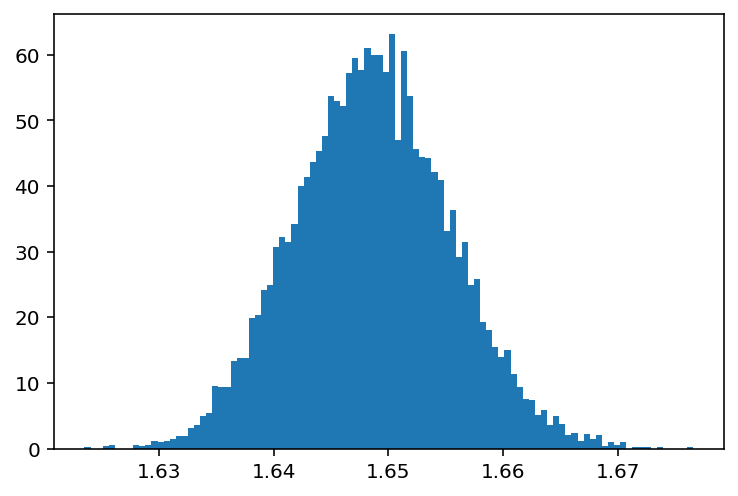

In [5]:
size = 10000

# The number of distributions that we will average
ndist = 100000

# Create an array of zeros and then accumulate the values from each draw.
dist =  np.zeros(size)
pbar = tqdm(desc='Averaging distributions',unit='dists',total=ndist)
for i in range(ndist):
    dist += np.random.lognormal(0,1,size)
    pbar.update(1)
pbar.close()

# Now divide by the number of distributions to find the average values
dist /= np.float(ndist)

# Plot the resultant distribution
hist = plt.hist(dist,bins=100,normed=True,edgecolor='none')

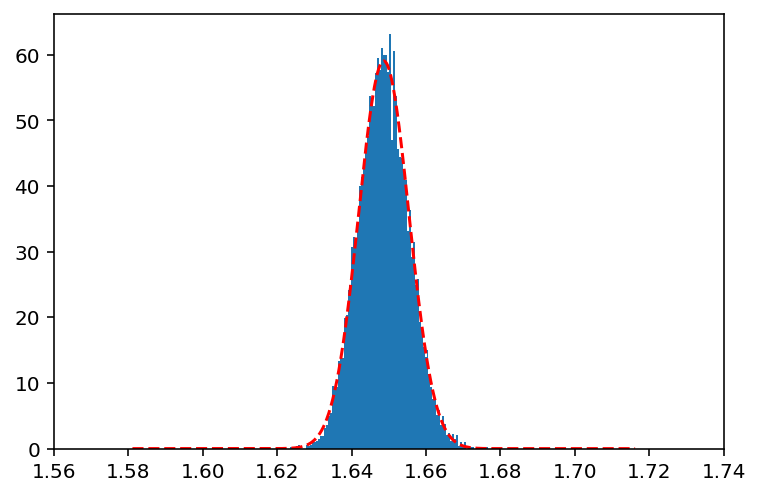

In [6]:
hist = plt.hist(dist,bins=100,normed=True,edgecolor='none')
x,y = gauss(x0=np.mean(dist),sig=np.std(dist))
plt.plot(x,y,'r--')
xlim = plt.xlim(1.56,1.74)